# CFPB COMPLAINT EXPLORATORY DATA ANALYSIS
### By Muhammad Raihan

![CFPB Logo](https://www.consumerfinance.gov/static/img/logo_161x34@2x.fff273f43f0a.png)

According to the [official website](https://www.consumerfinance.gov/), Consumer Financial Protection Bureau (CFPB) is a United States bureau agency that implements and enforces federal consumer financial law and ensures that markets for consumer financial products are fair, transparent, and competitive. Some of the functions and responsibilites of the CFPB are as follows:
- Consumer education,
- Rulemaking and enforcement,
- Supervision and examination,
- Complaint handling,
- Research and data analysis.

As part of the responsibilities, CFPB receives complaints submitted by consumers of federal financial products regarding the issues they encountered with financial products and services, which then would be handled by CFPB to be investigated and solved. CFPB stored these complaints into a database which are made publically available to be accessed.

CFPB conducts data analysis of the complaints to gain insights upon the markets and trends within the financial space in order to better understand and continuously improve in addressing issues affecting the consumers. As handling and processing complaints takes a lot of time and resources from both CFPB and the respective financial company, getting to know the trend and typical complaints being filed is vital to streamline and improve the overall process.

This jupyter notebook contains an Exploratory Data Analysis (EDA) on CFPB consumer complaint database filtered from 01 July 2018 up to 30 June 2023. The purpose of the EDA is to understand problems consumers' experienced within financial markets that would result in complaint filling, this includes:
- What types of products and issues are being complained,
- Trend between states and over a period of time,
- How do the complaints being handled by CFPB and the companies,
- Other insights that could be discovered.

## About the Data

The data is publically available in both the [CFPB official website](https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data) and [Google Public Dataset](https://console.cloud.google.com/marketplace/product/cfpb/complaint-database). The data is open and can be redistributed appropriately and legally according to the Google Terms of Service.

Before starting our exploration on the data, we need to understand how do the complaint data being published into the public database by CFPB. According to the [official website](https://www.consumerfinance.gov/data-research/consumer-complaints/), notable information are as follows:
- Only complaint data that have been verified and responded by the company are published, or after 15 days,
- Complaints referred to other regulators are not published,
- Complaint narratives are only shown if the consumer have provided consent and after CFPB have removed the personal information.

CFPB also details the explanation of each 17 columns in the database (further explanations are available on the [official website](https://www.consumerfinance.gov/complaint/data-use/)):
- **Date received**: the date the CFPB received the complaint (e.g., “05/25/2013”),
- **Product**: the type of product the consumer identified in the complaint (e.g., “Checking or savings account” or “Student loan”),
- **Sub-product**: the type of sub-product the consumer identified in the complaint (e.g., “Checking account” or “Private student loan”),
- **Issue**: the issue the consumer identified in the complaint (e.g., “Managing an account” or “Struggling to repay your loan”),
- **Sub-issue**: the sub-issue the consumer identified in the complaint (e.g., “Deposits and withdrawals” or “Problem lowering your monthly payments”),
- **Consumer complaint narrative**: consumer complaint narrative is the consumer-submitted description of “what happened” from the complaint,
- **Company public response**: the company’s optional, public-facing response to a consumer’s complaint,
- **Company**: the complaint is about this company (e.g., “ABC Bank”),
- **State**: the state of the mailing address provided by the consumer,
- **ZIP code**: the mailing ZIP code provided by the consumer,
- **Tags**: data that supports easier searching and sorting of complaints submitted by or on behalf of consumers,
- **Consumer consent provided?**: identifies whether the consumer opted in to publish their complaint narrative,
- **Submitted via**: how the complaint was submitted to the CFPB (e.g., “Web” or “Phone”),
- **Date sent to company**: the date the CFPB sent the complaint to the company,
- **Company response to consumer**: this is how the company responded (e.g., “Closed with explanation”),
- **Timely response?**: whether the company gave a timely response (e.g., “Yes” or “No”),
- **Consumer disputed?**: whether the consumer disputed the company’s response,
- **Complaint ID**: the unique identification number for a complaint.

`Product`, `Sub-product`, `Issue`, and `Sub-issue` columns are where the complaints being categorized. According to the [official document](https://files.consumerfinance.gov/f/documents/201704_cfpb_Consumer_Complaint_Form_Product_and_Issue_Options.pdf), these columns are used to categorize complaints in a hierarchical way. Products have sub-products, sub-products have issues, and issues can have sub-issues. Additional notes regarding the category structure are:
- Some issues may not have any sub-issue (e.g., issues from `Money transfer, virtual currency, or money service` or `Mortgage` product),
- Several sub-products could share the same set of issues (e.g., sub-products from `Mortage` or `Credit card or prepaid card` product)
- Almost all products have the option to choose credit-reporting-related issue, which then in the database the entries for `Issue` and `Sub-issue` would be from `Credit reporting, credit repair services, or other personal consumer reports` product type.

Diagram below presents a clearer explanation on how the complaints are mainly being organized.

<img src="https://i.imgur.com/Do6sBga.png" alt="Category Hierarchy" width=600>

Furthermore, CFPB also states a few additional cautionary advices when using the dataset:
- As the database solely only collects consumer complaints, they are not the complete representation of all consumers' experiences with a financial company or product,
- Consumers' may experience problems with their financial product, but not all those problems would result in consumers' filling a complaint, therefore some product with low complaints does not necessarily mean the consumers' are not having problem with them,
- Always compare the data with the appropriate or total population (e.g., company with fewer customers may receives less complaints simply due to not having enough customers complaining to begin with).

The timeframe used in this data (July 2018 - June 2023) is within one timeframe of database changes. CFPB change their data validation policy in April 2017 and in August 2023 according to the [official website](https://www.consumerfinance.gov/data-research/consumer-complaints/), therefore our whole dataset have one data validation policy of April 2017 and does not need to be adapted further (i.e., wrangling the data from different validation policies is not needed).

## Importing Packages

The packages we will be using include:
- `Pandas` – for loading and manipulating data
- `Seaborn`
- `Plotly` – for graphing
- `Uszipcode`

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import textwrap as txtwr
import Levenshtein
import geopandas as gpd
import uszipcode as uzc

from mpl_toolkits.axes_grid1 import make_axes_locatable
from uszipcode import SearchEngine

# Set the graphing style
sns.set_style('darkgrid')

## Preparing and Understanding the Data

In these first steps our objective is to fully prepare and getting a complete understanding of the kind of data we will be dealing with. For the purpose of this notebook, we will assume that the data values are already valid and ready to be analyzed. Steps in this process include:
1. Loading the data,
2. Inspecting the data structure and null value counts,
3. Correcting data types (if any),
4. Dropping unnecessary columns (if any).

### 1. Load the data

In [2]:
# Loading the data
raw_df = pd.read_csv('complaints.csv', engine='python', on_bad_lines='skip')

# P.S.: without engine='python' and on_bad_lines='skip' the syntax would throw a ParserError exception

### 2. Inspect the data structure and null value counts

In [3]:
# Inspecting the data structure
raw_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412033 entries, 0 to 2412032
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 2412033 non-null  object 
 1   Product                       2412033 non-null  object 
 2   Sub-product                   2411930 non-null  object 
 3   Issue                         2412033 non-null  object 
 4   Sub-issue                     2230925 non-null  object 
 5   Consumer complaint narrative  1037592 non-null  object 
 6   Company public response       1305482 non-null  object 
 7   Company                       2412032 non-null  object 
 8   State                         2387179 non-null  object 
 9   ZIP code                      2394873 non-null  object 
 10  Tags                          231685 non-null   object 
 11  Consumer consent provided?    2227145 non-null  object 
 12  Submitted via               

In [4]:
# Counting null values present in each column
raw_df.isnull().sum().sort_values(ascending=False)

Consumer disputed?              2412033
Tags                            2180348
Consumer complaint narrative    1374441
Company public response         1106551
Consumer consent provided?       184888
Sub-issue                        181108
State                             24854
ZIP code                          17160
Sub-product                         103
Company response to consumer          5
Date sent to company                  1
Timely response?                      1
Complaint ID                          1
Submitted via                         1
Company                               1
Product                               0
Issue                                 0
Date received                         0
dtype: int64

**Key Takeaways**:
- Out of 17 columns available, only both `Complaint ID` and `Consumer disputed?` columns have the numeric data type.
- `Complaint ID` column itself is better suited with `object` data type instead of `int64` as the numbers are not intended to be something one would do arithmetic operations on or to be ranked and more for strings of object identifiers.
- Both `Date received` and `Date sent to company` columns appears to be appropriate using `datetime` data type.
- Some columns have a large amount of null values present, particularly `Consumer disputed?` column which has exactly zero non-null values:
    - According to the [official statement](https://cfpb.github.io/api/ccdb/release-notes.html), CFPB has discountinued the consumer dispute option since 24 April 2017. This clarifies the complete absent of non-null values in `Consumer dispute?` column and we will drop the column later.
    - `Tags` column is optional by the CFPB to be tagged according to the [official website](https://www.consumerfinance.gov/data-research/consumer-complaints/). As there are more than 2 million missing entries, this render the column practically not helpful and we will also drop it later.
    - `Consumer complaint narrative` column is subject to the consent provided by the consumer, and therefore the missing values are the result of non-consensual permission by the respective consumer.
    - Companies are only optional to fill the `Company public response`, thus explaining the missing values inside the dataset.
    - Some issues do not have any sub-issues, therefore there are plenty of missing `Sub-issue` values in the dataset.

### 3. Look at the top entries

We will have a better grasp on how the data is by directly looking at the top and last entries.

In [5]:
# Looking at the data 
raw_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/23/21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",PA,19136,NaN,Consent not provided,Web,06/23/21,Closed with explanation,Yes,NaN,4486021.0
1,03/22/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,XX/XX/2021 I filed a dispute with all 3 bureau...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NV,XXXXX,Servicemember,Consent provided,Web,03/22/21,Closed with explanation,Yes,NaN,4234190.0
2,04/25/21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19143,NaN,Consent not provided,Web,04/25/21,Closed with explanation,Yes,NaN,4326058.0
3,06/23/21,Mortgage,VA mortgage,Incorrect information on your report,Account information incorrect,NaN,NaN,MidAmerica Mortgage Inc,NV,89131,"Older American, Servicemember",NaN,Phone,07/14/21,Closed with explanation,Yes,NaN,4486351.0
4,03/22/21,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,"On XXXX. XXXX, 2019, ENHANCED RECOVERY COMPANY...",NaN,ERC,OH,45039,NaN,Consent provided,Web,03/22/21,Closed with explanation,Yes,NaN,4234639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412028,06/24/20,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,NaN,PNC has issues with connecting bank account wi...,NaN,PNC Bank N.A.,VA,20171,NaN,Consent provided,Web,06/24/20,Closed with explanation,Yes,NaN,3714011.0
2412029,06/27/22,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77449,NaN,Consent not provided,Web,06/27/22,Closed with non-monetary relief,Yes,NaN,5711234.0
2412030,11/11/19,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes it acted appropriately as aut...,Millco Management,GA,31405,NaN,Consent not provided,Web,11/11/19,Closed with explanation,Yes,NaN,3434976.0
2412031,02/22/23,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,Per Cfr 1022.41 and 15 USC 1681 Permissibly pu...,NaN,ENCORE CAPITAL GROUP INC.,FL,346XX,NaN,Consent provided,Web,02/22/23,Closed with explanation,Yes,NaN,6604049.0


**Key Takeaways**:
- Both `Date received` and `Date sent to company` columns appear to have the date format of `%m/%d/%y`,
- The scrubbed information inside the `Consumer complaint narrative` column are replaced with `X`s,
- The last row appears to have defective input, we will remove the row later.

### 4. Change data types

Based on previous findings, here we will change the data type of column `Date received` and `Date sent to company` to `datetime` and `Complaint ID` to `object`

In [6]:
# Changing the date column data type
raw_df[['Date received', 'Date sent to company']] = raw_df[['Date received', 'Date sent to company']]\
                                                        .apply(pd.to_datetime, format='%m/%d/%y')

# Changing 'Complaint ID' data type
raw_df['Complaint ID'] = raw_df['Complaint ID'].astype('object')

In [7]:
# Re-inspecting the data structures after manipulation
raw_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                     float64
Complaint ID                            object
dtype: object

### 5. Drop unnecessary column and row

According to the discussion above, we will drop `Tags` and `Consumer disputed?` alongside with the defective last row for having numerous missing values making them irrelevant for our analyses.

In [8]:
# Dropping column 'Consumer disputed?' and 'Tags'
raw_df.drop(columns=['Consumer disputed?', 'Tags'], inplace=True)

# Dropping the last defective row
raw_df.drop(index=2412032, inplace=True)

# Dropping dates below July 1st 2018
below_jul2018 = raw_df[raw_df['Date received'] < '07-01-2018'].index
raw_df.drop(index=below_jul2018, inplace=True)

As we have completed the data preparation, let us define `df` as a copy of `raw_df` to declare that we have fully prepare the data.

In [9]:
# Defining 'df' as the fully prepared data
df = raw_df.copy()

## Data Analysis

Here we will start our analysis on the CFPB public dataset. Our main objective is to understand the types of complaints being filed by consumers and how are they being handled by the financial companies. Gaining deeper insights on the complaint data helps CFPB to formulate more robust regulation and protect consumers from misconducts and misunderstandings within financial services.

Here are the bullet points of each information we are trying to uncover from this data:
1. Types of complaint being filed the most, based on:
   - Products and sub-products
   - Issue and sub-issues
2. The trend of complaint filling:
   - Throughout time
   - Between states
   - Between companies
3. How are the complaints being handled, based on how company responses to consumer

### 1. Complaint Product Types

We will start by exploring what types of complaint being filed the most based on the product and issue category.

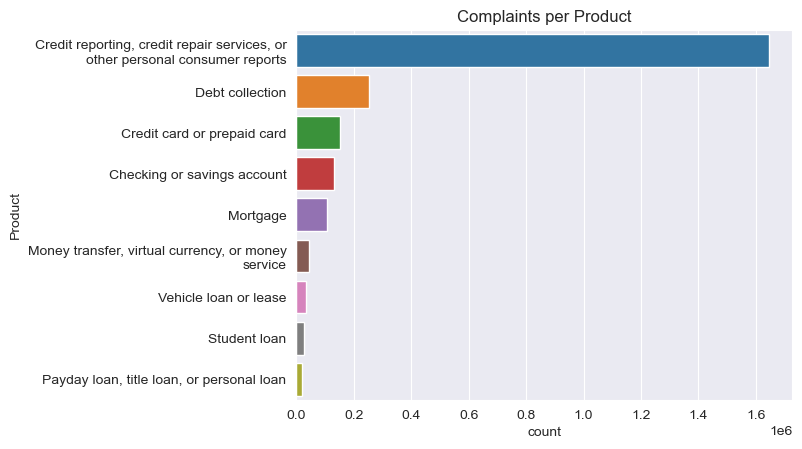

In [10]:
# Create the base of bar graph
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)

# Get the current axes
ax = plt.gca()

# Declare a list variable of labels with wrapped text
labels = [txtwr.fill(label, 45) for label in df['Product'].value_counts().index]

# Put the wrapped label text inside the graph axis
ax.set_yticklabels(labels)

plt.title('Complaints per Product');

In [11]:
# Declaring a copy dataframe to be manipulated
product_subdf = df[['Date received', 'Product', 'Complaint ID']].copy()

# Creating new month and year column
product_subdf['Quarter'] = product_subdf['Date received'].dt.quarter
product_subdf['Year'] = product_subdf['Date received'].dt.year
product_subdf['Quarter & Year'] = 'Q' + product_subdf['Quarter'].astype(str) + ' ' + product_subdf['Year'].astype(str)

# Creating a dataframe ready for time series plotting
product_subdf_grouped = product_subdf.groupby(['Quarter', 'Year', 'Product', 'Quarter & Year']).size()\
                                     .reset_index(name = 'Count')\
                                     .sort_values(by=['Year', 'Quarter'])

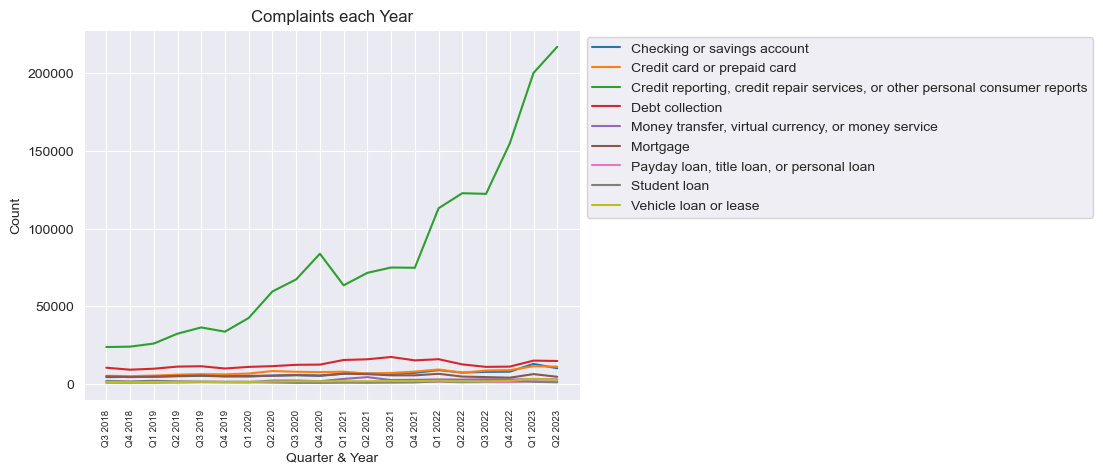

In [12]:
sns.lineplot(x='Quarter & Year', y='Count', hue='Product', data=product_subdf_grouped)

ax = plt.gca()

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), ha='center', rotation=90, fontsize=7)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Complaints each Year');

**Key Takeaways**:
- Credit reporting and related product are the most complained product type submitted to CFPB throughout July 2018 to June 2023 by a long margin at 1.6 million aggregate filings accounting for 68% of the total complaints. The rest of the product types only account for around 800 thousand, with the second most filed product type is debt collection followed with credit or prepaid card at third.
- Not only being the most complained product, credit reporting and related complaints are increasing at a high rate. Entering COVID-19 pandemic, the complaints have reached above 50,000 marks. while there are reductions in 2021, the complaints have skyrocketed to over 200,000 quartal complaints in 2023.
- The graphs tells that many consumers are having problems with the credit reporting agencies and complained them through CFPB to help them get resolved. As consumers could complaint directly to the respective financial company to solve their issues, many of those complaints might never reach CFPB before they have been resolved. However, the ones that either previously sent to their respective company or directly to the CFPB at once are mostly regarding credit reporting products. This could mean the following:
    - Many credit reporting problems are not getting resolved with their respective company, or at least the consumers are not satisfied with the company resolution. They, however, have faith in CFPB to reinforce their issues in order to get them properly and satisfyingly resolved by the company. In other words, the most disputes consumers have within financial space that require CFPB assistance are regarding credit reporting.
    - Other financial service issues could be resolved without any intervention from CFPB as they are more straighforward (e.g., bounced check), as a result of consumer negligence (e.g., ignoring loan statements), or other situations that would not require third party assistance of CFPB to resolve them.

Next we will investigate further the credit reporting and related product by inspecting its issues. As there are numerous amount of issues each product could have, we will limit and focus our analysis to just the top 10 issues.

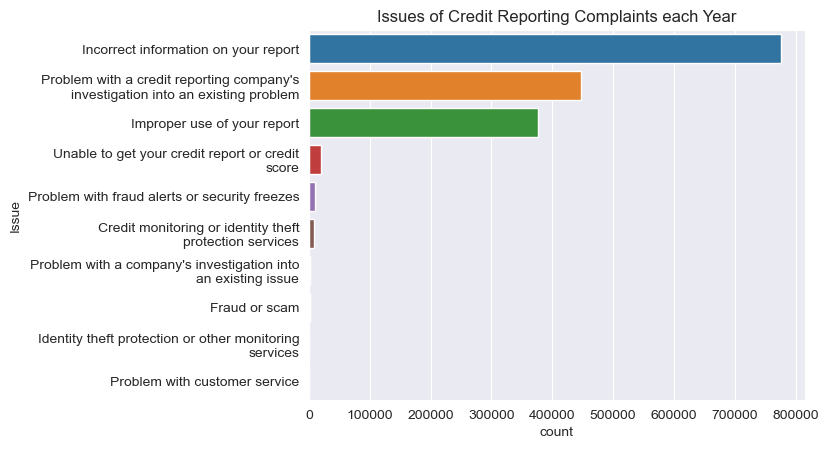

In [13]:
# Filtering data to only contain credit reporting product category
credit_reporting_related_df = df[df['Product'] == 'Credit reporting, credit repair services, or other personal consumer reports']

# Making list of top 10 issues within credit reporting-related product
top10_credit_reporting_related_issues = credit_reporting_related_df['Issue'].value_counts()[:10]

sns.countplot(y='Issue', 
              data=credit_reporting_related_df, 
              order=top10_credit_reporting_related_issues.index)

# Getting the current axes
ax = plt.gca()

# Wrapping labels
labels = [txtwr.fill(label, 45) for label in top10_credit_reporting_related_issues.index]

ax.set_yticklabels(labels)
plt.title('Issues of Credit Reporting Complaints each Year');

**Key Takeaways**:
- Around 98% of issues consumers have with credit reporting-related product are about as follows:
    - Incorrect information on the report
    - Problem with a credit reporting company's investigation into an existing problem
    - Improper use of the report
- This revelation shows that consumers are indeed having problems with how their credit reports are being handled by the agencies, and they complain the problems to CFPB to help them get resolved.

Next we will compare the complaint situation and how they are handled between the three major American credit reporting agencies (Experian, Equifax, TransUnion).

### 2. Credit Reporting Agency Analyses

Here we will analyse the three credit reporting agencies and compare each of them to see how are they performed compared to others and the institutions as a whole. First we will redo both total complaints and quartal time series plot for the three company.

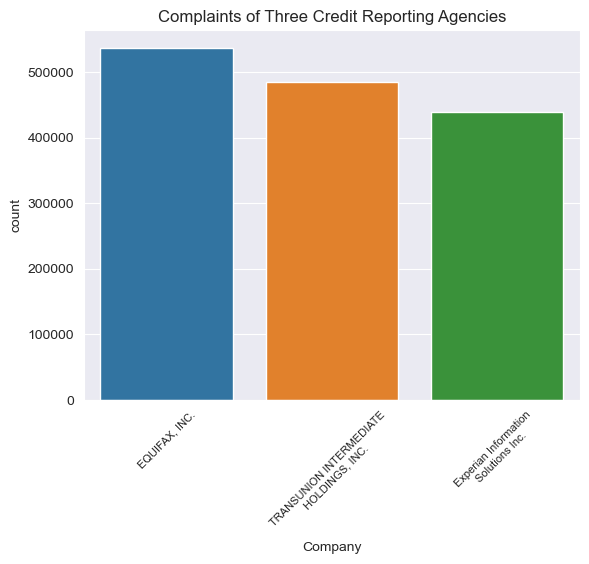

In [14]:
# Get the list of how the three agencies are registered inside the dataset 
the_3agencies = np.concatenate((
    df[df['Company'].str.contains('experian', case=False)]['Company'].unique(),
    df[df['Company'].str.contains('equifax', case=False)]['Company'].unique(),
    df[df['Company'].str.contains('transunion', case=False)]['Company'].unique()
))

# Declare new dataframe variable filtered for the three major credit reporting agencies
the_3agencies_df = df[df['Company'].isin(the_3agencies)].copy()

# Plotting the bar chart of total complaints sent between July 2018 to June 2023
sns.countplot(x='Company', 
              data=the_3agencies_df,
              order=the_3agencies_df['Company'].value_counts().index)

# Setting up the label texts
ax = plt.gca()
labels = [txtwr.fill(label, 25) for label in the_3agencies_df['Company'].value_counts().index]
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=8)
plt.title('Complaints of Three Credit Reporting Agencies');

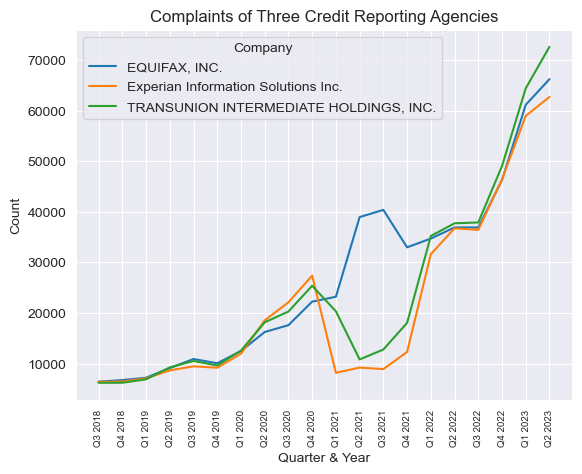

In [15]:
# Declare a copy dataframe to be manipulated
the_3agencies_subdf = the_3agencies_df[['Date received', 'Company', 'Complaint ID']].copy()

# Create new month and year column
the_3agencies_subdf['Quarter'] = the_3agencies_subdf['Date received'].dt.quarter
the_3agencies_subdf['Year'] = the_3agencies_subdf['Date received'].dt.year
the_3agencies_subdf['Quarter & Year'] = 'Q' + the_3agencies_subdf['Quarter'].astype(str) + ' ' + the_3agencies_subdf['Year'].astype(str)

# Dataframe ready for time series plotting
the_3agencies_subdf_grouped = the_3agencies_subdf.groupby(['Quarter', 'Year', 'Company', 'Quarter & Year']).size()\
                                                     .reset_index(name = 'Count')\
                                                     .sort_values(by=['Year', 'Quarter'])

# Plotting the time series chart of total complaints for each agencies sent between July 2018 to June 2023
sns.lineplot(x='Quarter & Year', y='Count', hue='Company', data=the_3agencies_subdf_grouped)

# Get the current axes
ax = plt.gca()

# Set up for the x labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), ha='center', rotation=90, fontsize=7)
plt.title('Complaints of Three Credit Reporting Agencies');

**Key Takeaways**:
- The three agencies have similar complaint count total, with Equifax having the most at around 540,000 complaints followed with TransUnion and Experian at below 500,000.
- Looking at the time series plot, the most obvious phenomenon happened during 2021, where TransUnion and Experian unexpectedly had a huge dive of quartal complaints for around 15,000 less file submitted to CFPB, while Equifax had a massive jump in their second quartal. It is unknown why this happened without more information explaining the situation, given the news nor CFPB themselves do not cover any supreme events regarding the situation (in fact, [Experian had a massive data breach](https://siliconangle.com/2021/05/02/experian-exposes-credit-scores-unprotected-api/#:~:text=Credit%20reporting%20company%20Experian%20plc%20has%20suffered%20a,U.S.%20exposed%20through%20an%20unprotected%20application%20programming%20interface.) in the second quartal, yet the graph does not show a major rebounce of complaints until 2022).
- This graph also confirms from the previous time series plot that the amount of complaints submitted (ignoring the anomaly in 2021) are increasing at a high rate, reaching more than 50,000 complaints filed against each of the three agencies at the start of 2023.

Next we will investigate how do the agencies handled the complaints. Below we look into the percentage of response the agencies gave to the consumers. We will focus more on relief-responses, which are the resolution that resulted in problems resolved either by corrections of the reports, monetary relief, or similar actions that satisfy the consumers. Knowing this we could infer at high level that whether the agencies are resolving their consumers' issues seriously and in a proper manner. First we need to know and handle the labels inside `Company response to consumer` column.

In [16]:
# Inspect the unique values of "company response to consumer" column
df['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Untimely response', 'In progress',
       nan], dtype=object)

We will combine "closed with non-monetary relief" and "closed with monetary relief" as "closed with relief" and change everything else as "other".

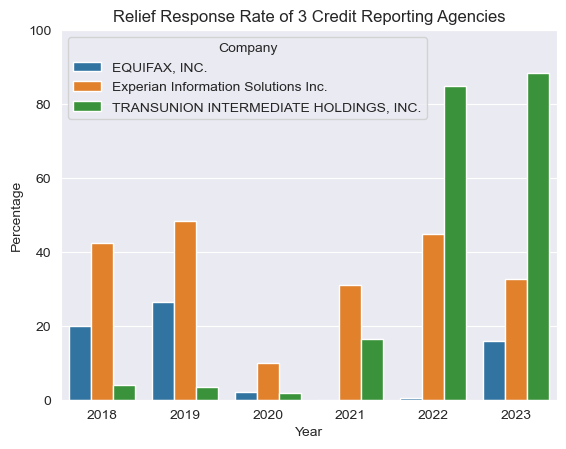

In [17]:
# Declare a copy of the original dataframe to be manipulated
responses_df = df.copy()

# Replace values
responses_df['Company response to consumer'].replace(inplace=True,
    to_replace={'Closed with non-monetary relief': 'Closed with relief',
                'Closed with monetary relief': 'Closed with relief',
                'Closed with explanation': 'Closed without relief',
                'In progress': 'Closed without relief',
                'Untimely response': 'Closed without relief',
                np.nan: 'Closed without relief'}
)

response_3agencies_df = responses_df[responses_df['Company'].isin(the_3agencies)]\
                            [['Date received', 'Company', 'Company response to consumer', 'Complaint ID']]

response_3agencies_df['Year'] = response_3agencies_df['Date received'].dt.year

# Dataframe ready for time series plotting
response_3agencies_df = response_3agencies_df\
                                        .groupby(['Year', 'Company', 'Company response to consumer']).size()\
                                        .reset_index(name = 'Count')\
                                        .sort_values(by=['Company', 'Year'])

response_3agencies_df['Response total'] = response_3agencies_df.groupby(['Year', 'Company'])['Count'].transform('sum')
response_3agencies_df['Percentage'] = response_3agencies_df['Count'] / response_3agencies_df['Response total'] * 100

relief_response_3agencies = response_3agencies_df[response_3agencies_df['Company response to consumer'] == 'Closed with relief']

sns.barplot(data=relief_response_3agencies, x='Year', y='Percentage', hue='Company')
plt.ylim(0, 100)
plt.title('Relief Response Rate of 3 Credit Reporting Agencies');

**Key Takeaways**:
- Equifax: they have the lowest track record of having relief-response resolutons. Furthermore, from 2020 to 2022 they have relief-response rate of below 2%. While entering 2023 they have rebounded their relief-response rate, it still is at below 20%.
- Experian: they have the best relief-response rate from 2018 to 2021. From 2018 to 2019 they have relief-response rate of above 40%, though along with Equifax entering pandemic down to below 10%. Since then, they have rebounded back to between 30% and 50%.
- TransUnion: they currently performs the best with high relief-response rate far above their competitors at above 80% since 2022. This is a magnificent improvement knowing that they were performing the worst from 2018.

Overall, the relief-response resolutions dropped during the pandemic in 2020 and 2021. Hypothetically this could be the result of hectic situations and the company was not prepared to handle the big jump in complaints, though this conclusions needed more grounded information regarding the situations back then.

This concludes our analyses on credit reporting agencies. We will move on to another sector in finance, banking.

### 3. Banking Sector Analyses

We will focus our analyses on the biggest banking company in America by total assets, or nicknamed the "Big Four" (JPMorgan Chase, Bank of America, Citigroup, Wells Fargo). We will structure our analyses similar from previous credit reporting agency analyses, where we will count the complaints per company total and each quartal-year and see how are they are handled. As banking has more product and services offered, we will also analyse the types of products and issues there is in the database.

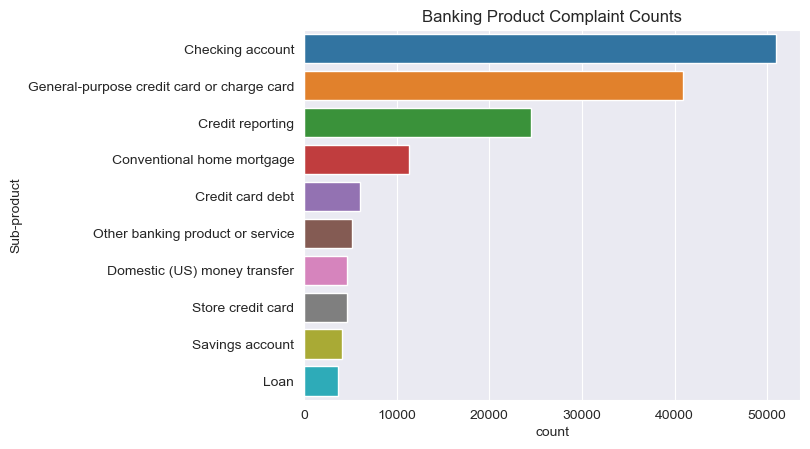

In [18]:
# Get the proper company name from the dataset and combining them into one array
big_4banks = np.concatenate((
    df[df['Company'].str.contains('jpmorgan', case=False)]['Company'].unique(),
    df[df['Company'].str.contains('bank of america', case=False)]['Company'].unique(),
    df[df['Company'].str.contains('citibank', case=False)]['Company'].unique(),
    df[df['Company'].str.contains('wells', case=False)]['Company'].unique()
))

# Declare new dataframe containing of only the big four banks
big_4banks_df = df[df['Company'].isin(big_4banks)].copy()

# Top 10 products complained within banking sector
top10_big_4banks_product = big_4banks_df['Sub-product'].value_counts()[:10].index

# Plotting the data
sns.countplot(data=big_4banks_df, y='Sub-product', order=top10_big_4banks_product)
plt.title('Banking Product Complaint Counts');

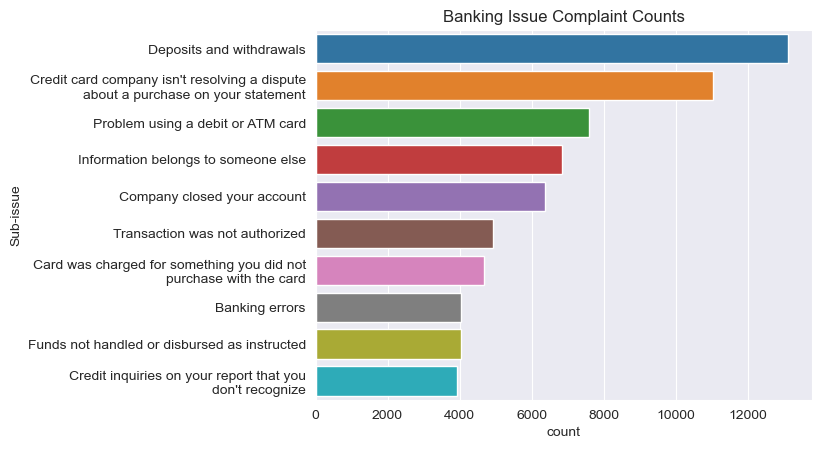

In [19]:
# Top 10 issues complained within banking sector
top10_big_4banks_issue = big_4banks_df['Sub-issue'].value_counts()[:10].index

# Plotting the data
sns.countplot(data=big_4banks_df, y='Sub-issue', order=top10_big_4banks_issue)

# Setting up the label texts
ax = plt.gca()
labels = [txtwr.fill(label, 45) for label in top10_big_4banks_issue]
ax.set_yticklabels(labels)
plt.title('Banking Issue Complaint Counts');

**Key Takeaways**:
- The top 3 products complained which accumulates up to 66% of the total complained products within banking sectors among the big fours are:
    - Checking account
    - Credit/charge card
    - Credit reporting
- Deposits and withdrawals are among the most issues the consumers have within banking sectors.

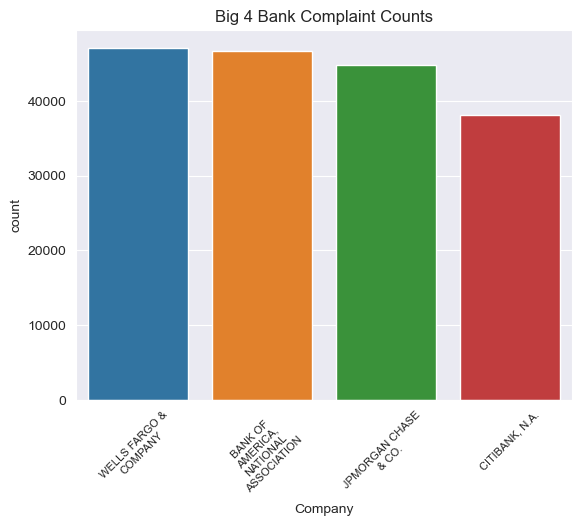

In [20]:
# Plotting the bar chart of total complaints sent between July 2018 to June 2023
sns.countplot(x='Company', 
              data=big_4banks_df,
              order=big_4banks_df['Company'].value_counts().index)

# Setting up the label texts
ax = plt.gca()
labels = [txtwr.fill(label, 15) for label in big_4banks_df['Company'].value_counts().index]
ax.set_xticklabels(labels, ha='center', rotation=45, fontsize=8)
plt.title('Big 4 Bank Complaint Counts');

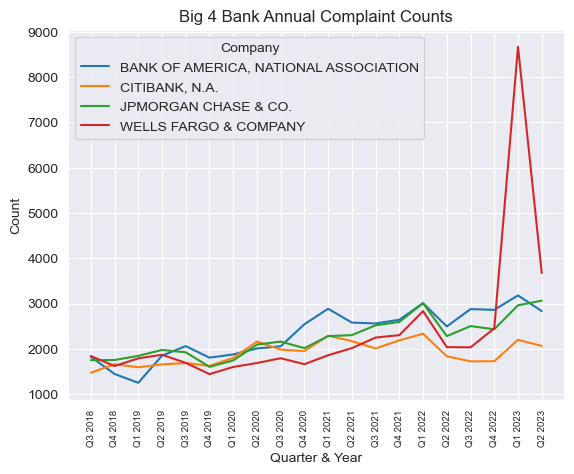

In [21]:
# Declare a copy dataframe to be manipulated
big_4banks_subdf = big_4banks_df[['Date received', 'Company', 'Complaint ID']].copy()

# Create new month and year column
big_4banks_subdf['Quarter'] = big_4banks_subdf['Date received'].dt.quarter
big_4banks_subdf['Year'] = big_4banks_subdf['Date received'].dt.year
big_4banks_subdf['Quarter & Year'] = 'Q' + big_4banks_subdf['Quarter'].astype(str) + ' ' + big_4banks_subdf['Year'].astype(str)

# Dataframe ready for time series plotting
big_4banks_subdf_grouped = big_4banks_subdf.groupby(['Quarter', 'Year', 'Company', 'Quarter & Year']).size()\
                                                     .reset_index(name = 'Count')\
                                                     .sort_values(by=['Year', 'Quarter'])

# Plotting the time series chart of total complaints for each agencies sent between July 2018 to June 2023
sns.lineplot(x='Quarter & Year', y='Count', hue='Company', data=big_4banks_subdf_grouped)

# Get the current axes
ax = plt.gca()

# Set up for the x labels
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), ha='center', rotation=90, fontsize=7)
plt.title('Big 4 Bank Annual Complaint Counts');

**Key Takeaways**:
- Wells Fargo have slightly more complaints than the rest in total for 47,000 file submitted to CFPB. Entering 2023, the company had a huge spike in complaints. This is regarding the scandal the company was in about [misconducts of loan and mortgage](https://www.cnbc.com/2023/01/19/wells-fargo-might-owe-you-money-how-to-get-it.html) products to its customers' at the end of 2022.
- Throughout the year, the complaints each company had had steadily increase. Except for Bank of America, the companies did not have a large jump in complaints received at the start of pandemic in 2020 unlike what the credit reporting agencies had.

Now we will analyze how do the companies handled the complaints by looking at their relief-response rate like we did with the credit reporting agencies.

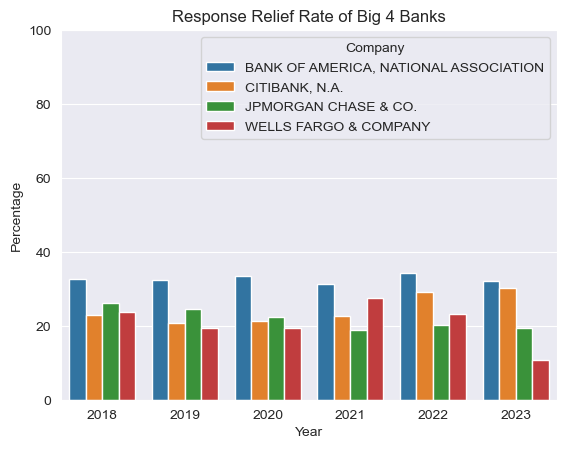

In [22]:
response_big4_df = responses_df[responses_df['Company'].isin(big_4banks)]\
                            [['Date received', 'Company', 'Company response to consumer', 'Complaint ID']].copy()

response_big4_df['Year'] = response_big4_df['Date received'].dt.year

# Dataframe ready for time series plotting
response_big4_df = response_big4_df.groupby(['Year', 'Company', 'Company response to consumer']).size()\
                                    .reset_index(name='Count')\
                                    .sort_values(by=['Company', 'Year'])

response_big4_df['Response total'] = response_big4_df.groupby(['Year', 'Company'])['Count'].transform('sum')
response_big4_df['Percentage'] = response_big4_df['Count'] / response_big4_df['Response total'] * 100

relief_response_big4_df = response_big4_df[response_big4_df['Company response to consumer'] == 'Closed with relief']

sns.barplot(data=relief_response_big4_df, x='Year', y='Percentage', hue='Company')
plt.ylim(0, 100)
plt.title('Response Relief Rate of Big 4 Banks');

**Key Takeaways**:
- All companies throughout the year are consistent in their relief-response rate at around 20-40% annually.
- Bank of America consistently scored the best at above 30% rate, while Citibank gradually improving their response handling.
- Nevertheless, the companies still only have relief-response rate below 50% which indicates that many complaints still are not being resolved with consumer satisfactory.

Overall, the top 4 major banking players still perform good with respect to how many complaints they are receiving with respect to their overall market size and other financial institutions.

Next we will analyze the complaint data with respect to the geographic area to see whether there are patterns across the states.

### 4. Geographic Analyses

In this section we will analyze the trends of consumer complaints across the states & zip codes and compare their characteristics based on demographic and economic statistics. We will utilize [official population census data](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html) and `uszipcode` package which contains various demographic and economic statistics scraped from official government websites.

As we are dealing with population data, we need to first turn the complaint counts into rate with respect to the whole state and zip code total population (in this case we will use per 1000 people for state-wise counts and XXX for zip-wise counts).

In [23]:
# Loading the population census data
pop_data = pd.read_csv('pop_est_data_2022.csv')

# Creating new dataframe table for geographic analysis purposes
geographic_df = df.copy()

# State-level focused dataframe
state_df = geographic_df.groupby(['State']).size().reset_index(name='Complaint counts')

# Joining state df and population data
state_df = pd.merge(state_df, pop_data, on='State')

# Creating X per 1000 people rate column
state_df['Complaints per 1000 people'] = np.round((state_df['Complaint counts'] / state_df['Pop Est Count'] * 1000), 2)

In [24]:
# Loading geospatial data
map_df = gpd.read_file('tl_2022_us_state/tl_2022_us_state.shp')

# Using EPSG:4269 geospatial reference
map_df = map_df.to_crs("EPSG:4269")

# Only taking the mainland states
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
for n in non_continental:
    map_df = map_df[map_df.STUSPS != n]

# Merging with complaint count data
map_df = map_df.merge(state_df, left_on='STUSPS', right_on='State')

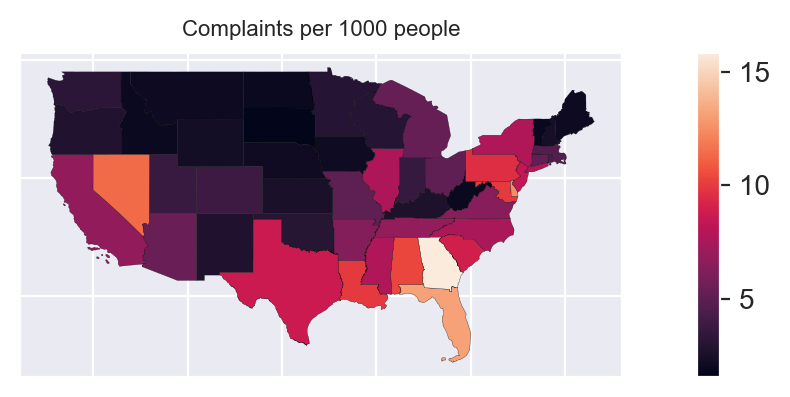

In [25]:
# Creating map plot
f,ax = plt.subplots(1,1, figsize=(5,4), sharex=True, sharey=True, dpi=200)
plt.title('Complaints per 1000 people', fontsize=8)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%" ,pad=0, alpha=0.5)
map_df.plot('Complaints per 1000 people', ax=ax, edgecolor='k', legend=True, linewidth=0.1, cax=cax)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

**Key Takeaways**:
- Georgia score the highest at 17 complaints per 1000 residence. Equifax being headquartered in Georgia is probably the reason for the high complaint counts. States surrounding Georgia also have a relatively high complaint counts like Florida and Missouri.
- Washington, D.C. and Nevada scored the second and third in the data.

Now we will analyze into the demographic and economic data of each region (zip code level) and summarize them to see the pattern.

In [26]:
# Uszipcode tool
se = SearchEngine()

# Removing rows with scrubbed zip code data
zip_df = df.copy()
zip_df = zip_df.dropna(subset=('ZIP code'))
zip_df[zip_df['ZIP code'].str.isdigit()]

# Creating new column extracting median household income per zip code
def extract_median_income(zipcode):
    zipcode_info = se.by_zipcode(zipcode)
    if zipcode_info and hasattr(zipcode_info, 'median_household_income'):
        return zipcode_info.median_household_income
    else:
        return None
zip_df['Median income'] = zip_df['ZIP code'].apply(extract_median_income)

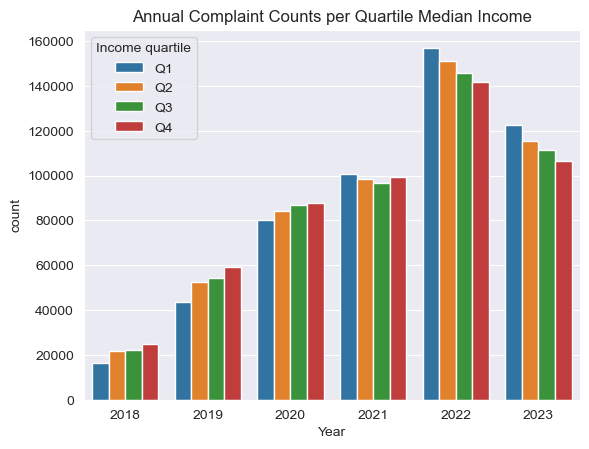

In [27]:
# Categorizing the median income into quartiles
quartile = ('Q1', 'Q2', 'Q3', 'Q4')
zip_df['Income quartile'] = pd.qcut(zip_df['Median income'], q=4, labels=quartile)
zip_df['Year'] = zip_df['Date received'].dt.year

sns.countplot(data=zip_df, x='Year', hue='Income quartile')
plt.title('Annual Complaint Counts per Quartile Median Income');

**Key Takeaways**:
- It used to be that, the bigger the income, the more likely the population to submit a complaint to CFPB.
- Entering 2021, however, the income distribution was roughly equal. Then in 2022 the situation was flipped, the lower the income, the more likely the population to submit a complaint.
- This could be interpreted as that, before and at the start of the pandemic, wealthier population which could have more financial products are more likely to encounter more problems. However, as the pandemic goes on, less wealthier population started to encounter more problems with their financial products, most likely from pandemic hardships and being used by the companies without proper conducts and regulations.

## Conclusion and Proposals

We have looked at various data within the CFPB complaint database and discover some insights, including:
- Credit reporting being number one product complaints, with most issues are incorrect credit report; investigation problem; and misuse reporting.
- High increase complaints during pandemic, which skyrocketed from 2022.
- As for banking products, deposits/withdrawals and credit card purchase disputes are among the most filled complaints
- Complaints between the major players are similar, with few exception of company major event like the Wells Fargo scandal
- Relief rate remains mid to low between the major players.
- South east states remains the highest in complaint counts.
- Household with more wealth are more likely to submit complaints.

Therefore, here are some proposals suggested for improvement of CFPB and financial company as a whole:
- Credit reporting improvements:
    - Improve credit input and scoring process, especially to further regulate the data furnishers to properly validate informations that would end up in the consumers credit reports.
    - Through FCRA (Fair Credit Reporting Act) CFPB shall watch closely against the agencies to make sure proper code of ethics are in place regarding internal complaint handling and uses of consumers' report.
    - As for the agencies, proper team of consumers' complaints needed to be assembled and trained accordingly to handle massive amount of complaints entering. The agencies should not expect to lightly process many complaints that deemed without any basis.
- Banking products improvements:
   - Proper educations are needed for the consumers to know exactly how deposits and withdrawals work to avoid misunderstandings, and to also investigate fraud checks that could happened.
   - Improve securities on credit account information and educate consumers how to securely manage their credit accounts.